# Carga y Exploración de Datos

Importe de librerias necesarias en la exploración

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import col
from pyspark.sql.functions import *

from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline


## Carga de Datos

Se carga la tabla desde el catalog

In [0]:
df_churn = spark.read.table(
    "Corona.bronce.wa_fn_use_c_telco_customer_churn"
)
display(df_churn)

customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn 7590-VHVEG Female 0 Yes No 1 No No phone service DSL No Yes No No No No Month-to-month Yes Electronic check 29.85 30 No 5575-GNVDE Male 0 No No 34 Yes No DSL Yes No Yes No No No One year No Mailed check 56.95 1890 No 3668-QPYBK Male 0 No No 2 Yes No DSL Yes Yes No No No No Month-to-month Yes Mailed check 53.85 108 Yes 7795-CFOCW Male 0 No No 45 No No phone service DSL Yes No Yes Yes No No One year No Bank transfer (automatic) 42.3 1841 No 9237-HQITU Female 0 No No 2 Yes No Fiber optic No No No No No No Month-to-month Yes Electronic check 70.7 152 Yes 9305-CDSKC Female 0 No No 8 Yes Yes Fiber optic No No Yes No Yes Yes Month-to-month Yes Electronic check 99.65 821 Yes 1452-KIOVK Male 0 No Yes 22 Yes Yes Fiber optic No Yes No No Yes No Month-to-month Yes Credit card (automatic) 89.1 1949 No 6713-OKOMC Female 0 No No 10 No No phone service DSL Yes No No No No No Month-to-month No Mailed check 29.75 302 No 7892-POOKP Female 0 Yes No 28 Yes Yes Fiber optic No No Yes Yes Yes Yes Month-to-month Yes Electronic check 104.8 3046 Yes 6388-TABGU Male 0 No Yes 62 Yes No DSL Yes Yes No No No No One year No Bank transfer (automatic) 56.15 3488 No 9763-GRSKD Male 0 Yes Yes 13 Yes No DSL Yes No No No No No Month-to-month Yes Mailed check 49.95 587 No 7469-LKBCI Male 0 No No 16 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Two year No Credit card (automatic) 18.95 327 No 8091-TTVAX Male 0 Yes No 58 Yes Yes Fiber optic No No Yes No Yes Yes One year No Credit card (automatic) 100.35 5681 No 0280-XJGEX Male 0 No No 49 Yes Yes Fiber optic No Yes Yes No Yes Yes Month-to-month Yes Bank transfer (automatic) 103.7 5036 Yes 5129-JLPIS Male 0 No No 25 Yes No Fiber optic Yes No Yes Yes Yes Yes Month-to-month Yes Electronic check 105.5 2686 No 3655-SNQYZ Female 0 Yes Yes 69 Yes Yes Fiber optic Yes Yes Yes Yes Yes Yes Two year No Credit card (automatic) 113.25 7895 No 8191-XWSZG Female 0 No No 52 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Mailed check 20.65 1023 No 9959-WOFKT Male 0 No Yes 71 Yes Yes Fiber optic Yes No Yes No Yes Yes Two year No Bank transfer (automatic) 106.7 7382 No 4190-MFLUW Female 0 Yes Yes 10 Yes No DSL No No Yes Yes No No Month-to-month No Credit card (automatic) 55.2 528 Yes 4183-MYFRB Female 0 No No 21 Yes No Fiber optic No Yes Yes No No Yes Month-to-month Yes Electronic check 90.05 1863 No 8779-QRDMV Male 1 No No 1 No No phone service DSL No No Yes No No Yes Month-to-month Yes Electronic check 39.65 40 Yes 1680-VDCWW Male 0 Yes No 12 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service One year No Bank transfer (automatic) 19.8 202 No 1066-JKSGK Male 0 No No 1 Yes No No No internet service No internet service No internet service No internet service No internet service No internet service Month-to-month No Mailed check 20.15 20 Yes 3638-WEABW Female 0 Yes No 58 Yes Yes DSL No Yes No Yes No No Two year Yes Credit card (automatic) 59.9 3505 No 6322-HRPFA Male 0 Yes Yes 49 Yes No DSL Yes Yes No Yes No No Month-to-month No Credit card (automatic) 59.6 2970 No 6865-JZNKO Female 0 No No 30 Yes No DSL Yes Yes No No No No Month-to-month Yes Bank transfer (automatic) 55.3 1531 No 6467-CHFZW Male 0 Yes Yes 47 Yes Yes Fiber optic No Yes No No Yes Yes Month-to-month Yes Electronic check 99.35 4749 Yes 8665-UTDHZ Male 0 Yes Yes 1 No No phone service DSL No Yes No No No No Month-to-month No Electronic check 30.2 30 Yes 5248-YGIJN Male 0 Yes No 72 Yes Yes DSL Yes Yes Yes Yes Yes Yes Two year Yes Credit card (automatic) 90.25 6369 No 877

## Exploración

Conocimiento de tipo de datos, dimensión y descripción basica

In [0]:
#Resumen de información de las columnas
display(df_churn.summary())

#Estadísticas descriptivas de las columnas numéricas
display(df_churn.describe())

summary customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn count 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7032 7043 mean null null 0.1621468124378816 null null 32.37114865824223 null null null null null null null null null null null null 64.76169246059922 2283.3205 null stddev null null 0.3686116056100118 null null 24.55948102309448 null null null null null null null null null null null null 30.09004709767847 2266.7689499709136 null min 0002-ORFBO Female 0 No No 0 No No DSL No No No No No No Month-to-month No Bank transfer (automatic) 18.25 19 No 25% null null 0 null null 9 null null null null null null null null null null null null 35.5 401 null 50% null null 0 null null 29 null null null null null null null null null null null null 70.35 1397 null 75% null null 0 null null 55 null null null null null null null null null null null null 89.85 3792 null max 9995-HOTOH Male 1 Yes Yes 72 Yes Yes No Yes Yes Yes Yes Yes Yes Two year Yes Mailed check 118.75 8685 Yes

summary customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn count 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7043 7032 7043 mean null null 0.1621468124378816 null null 32.37114865824223 null null null null null null null null null null null null 64.76169246059922 2283.3205 null stddev null null 0.3686116056100118 null null 24.55948102309448 null null null null null null null null null null null null 30.09004709767847 2266.7689499709136 null min 0002-ORFBO Female 0 No No 0 No No DSL No No No No No No Month-to-month No Bank transfer (automatic) 18.25 19 No max 9995-HOTOH Male 1 Yes Yes 72 Yes Yes No Yes Yes Yes Yes Yes Yes Two year Yes Mailed check 118.75 8685 Yes

Conocer variable objetivo

In [0]:
display(df_churn.groupBy("Churn").count())

Churn count No 5174 Yes 1869

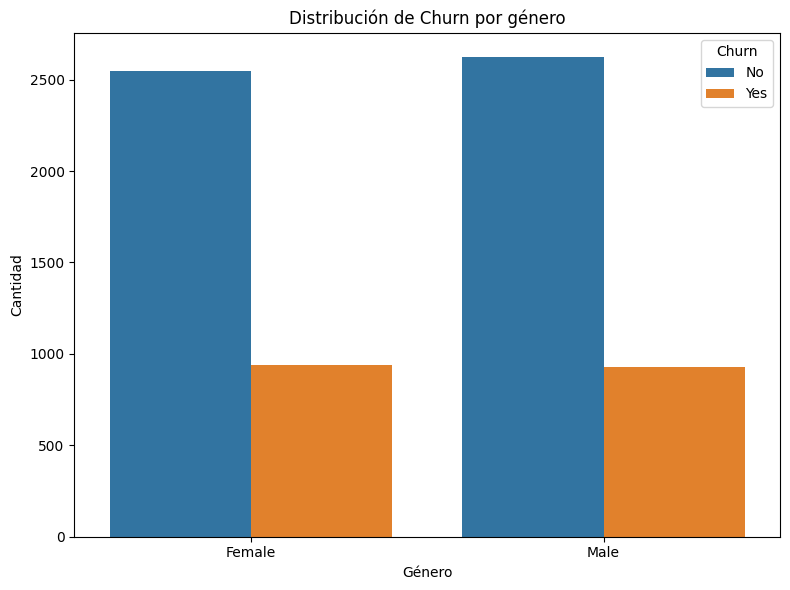

In [0]:

df_pd = df_churn.groupBy("Churn", "gender").count().orderBy("Churn", "gender").toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd, x="gender", y="count", hue="Churn")
plt.title("Distribución de Churn por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.tight_layout()
display(plt.gcf())
plt.close()

Nota: EN cuanto a genero tienen un buen balance, esto evita sesgos de genero 

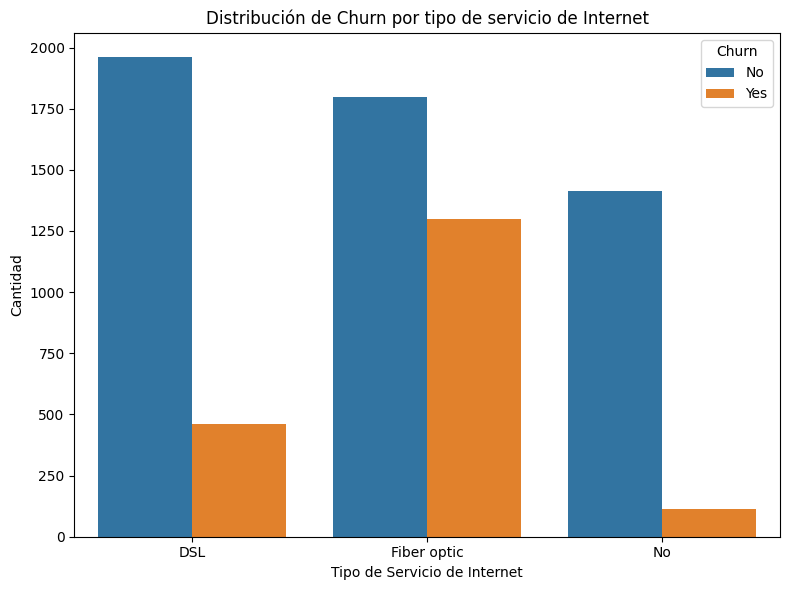

In [0]:
df_pd_internet = df_churn.groupBy("Churn", "InternetService").count().orderBy("Churn", "InternetService").toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd_internet, x="InternetService", y="count", hue="Churn")
plt.title("Distribución de Churn por tipo de servicio de Internet")
plt.xlabel("Tipo de Servicio de Internet")
plt.ylabel("Cantidad")
plt.tight_layout()
display(plt.gcf())
plt.close()

Nota: Se observa una cantidad alta de churn en Fiber Optic

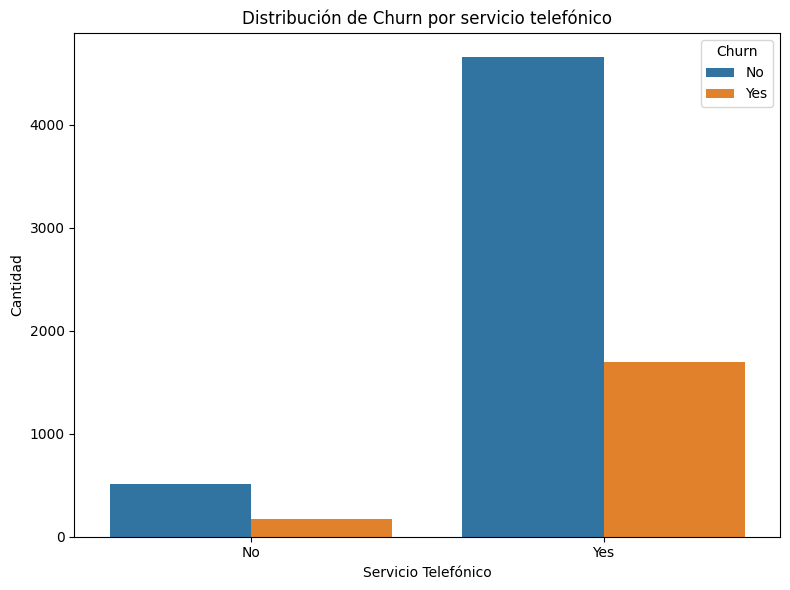

In [0]:
df_pd_phone = df_churn.groupBy("Churn", "PhoneService").count().orderBy("Churn", "PhoneService").toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd_phone, x="PhoneService", y="count", hue="Churn")
plt.title("Distribución de Churn por servicio telefónico")
plt.xlabel("Servicio Telefónico")
plt.ylabel("Cantidad")
plt.tight_layout()
display(plt.gcf())
plt.close()

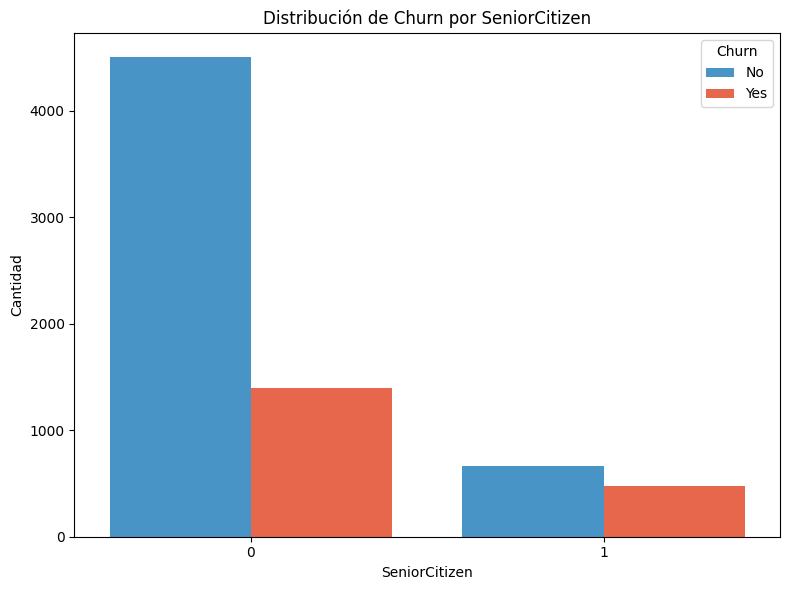

In [0]:
df_pd_senior = df_churn.groupBy("Churn", "SeniorCitizen").count().orderBy("Churn", "SeniorCitizen").toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd_senior, x="SeniorCitizen", y="count", hue="Churn",palette={"Yes": "#FF5733", "No":"#3498DB"})
plt.title("Distribución de Churn por SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Cantidad")
plt.tight_layout()
display(plt.gcf())
plt.close()

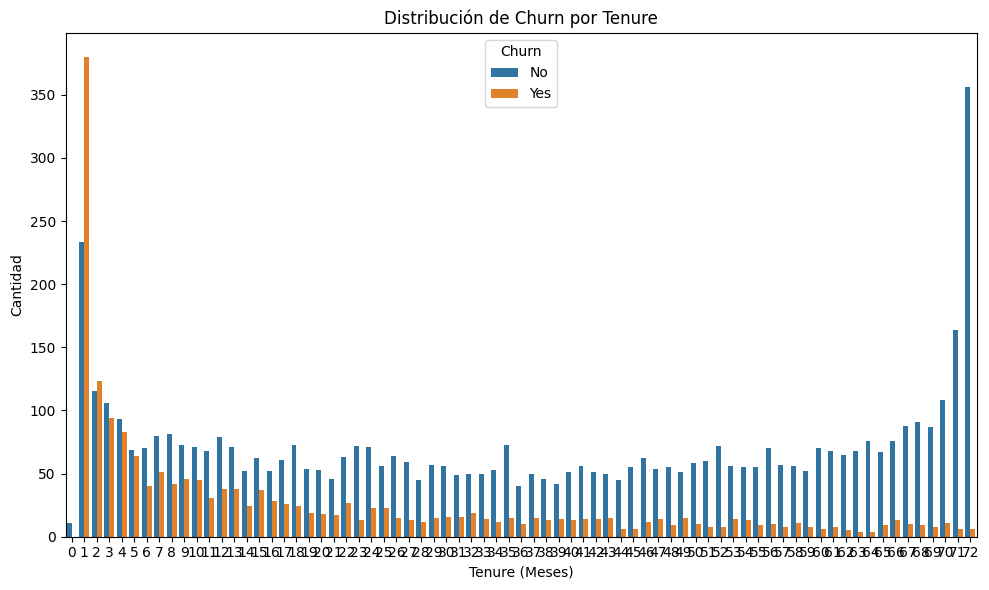

In [0]:
df_pd_tenure = df_churn.groupBy("Churn", "tenure").count().orderBy("tenure", "Churn").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_pd_tenure, x="tenure", y="count", hue="Churn")
plt.title("Distribución de Churn por Tenure")
plt.xlabel("Tenure (Meses)")
plt.ylabel("Cantidad")
plt.tight_layout()
display(plt.gcf())
plt.close()

Nota: En cuanto a la tenencia del servicio, se observa que es mas comun ver personas que no llevan tantos meses hacer churn que cuando ya llevan mas de 50 meses. 

/home/spark-3946e4c5-b915-40a4-8ef3-4f/.ipykernel/4287/command-5235025601280902-3911371124:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pd_totalcharges, x="Churn", y="TotalCharges", palette={"Yes": "#FF5733", "No": "#3498DB"})


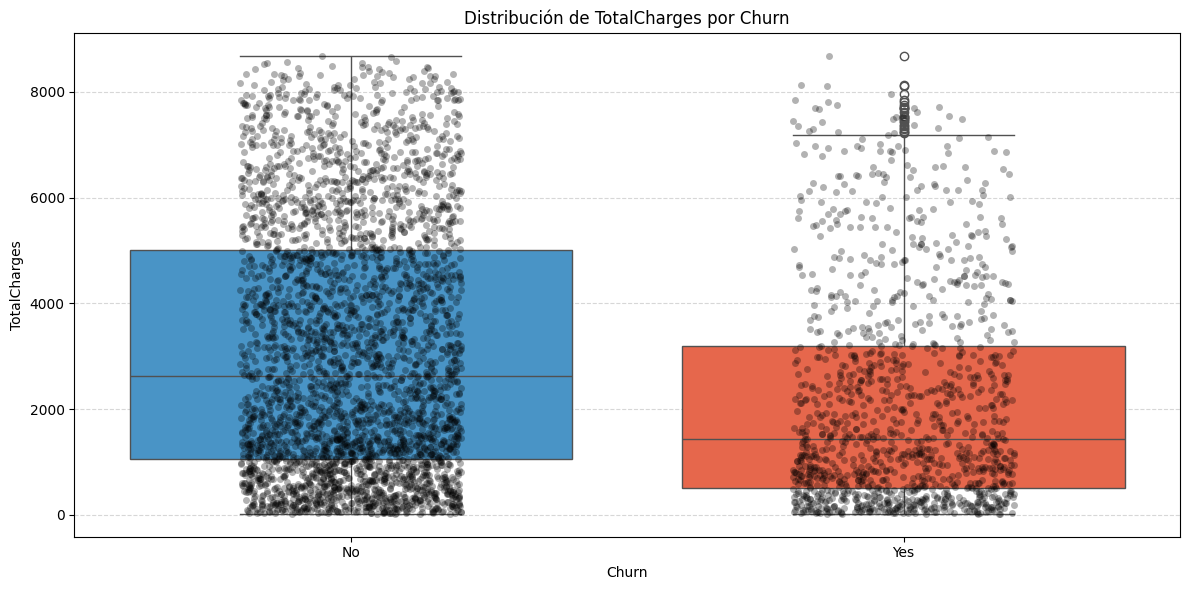

In [0]:
#Grafica de Cargos totales por Churn

df_pd_totalcharges = (
    df_churn
    .filter(col("TotalCharges").isNotNull())
    .groupBy("Churn", "TotalCharges")
    .count()
    .orderBy("TotalCharges", "Churn")
    .toPandas()
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pd_totalcharges, x="Churn", y="TotalCharges", palette={"Yes": "#FF5733", "No": "#3498DB"})
sns.stripplot(data=df_pd_totalcharges, x="Churn", y="TotalCharges", color="black", alpha=0.3, jitter=0.2)
plt.title("Distribución de TotalCharges por Churn")
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
display(plt.gcf())
plt.close()

Nota: Analizando los cargos totales, la mayor concentración de churn es cuando esta en el rango entre 1000 y 3000; esta simple grafica podría ayudarle al negocio a formular estrategias a los clientes que se encuentran en este rango.

In [0]:
#Mostrar la cantidad de valores nulos por columna
null_counts = df_churn.select([col(c).isNull().cast("int").alias(c) for c in df_churn.columns]).groupBy().sum()
display(null_counts)

sum(customerID) sum(gender) sum(SeniorCitizen) sum(Partner) sum(Dependents) sum(tenure) sum(PhoneService) sum(MultipleLines) sum(InternetService) sum(OnlineSecurity) sum(OnlineBackup) sum(DeviceProtection) sum(TechSupport) sum(StreamingTV) sum(StreamingMovies) sum(Contract) sum(PaperlessBilling) sum(PaymentMethod) sum(MonthlyCharges) sum(TotalCharges) sum(Churn) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 0

Se observan nulos en la columna TotalCharges, son solo 11 registros; por ende la decisión sera rellenar con ceros.

In [0]:
null_totalcharges = df_churn.filter(col("TotalCharges").isNull()).count()
display(null_totalcharges)

11

In [0]:
#Rellenar con ceros
df_churn = df_churn.fillna({"TotalCharges": 0})

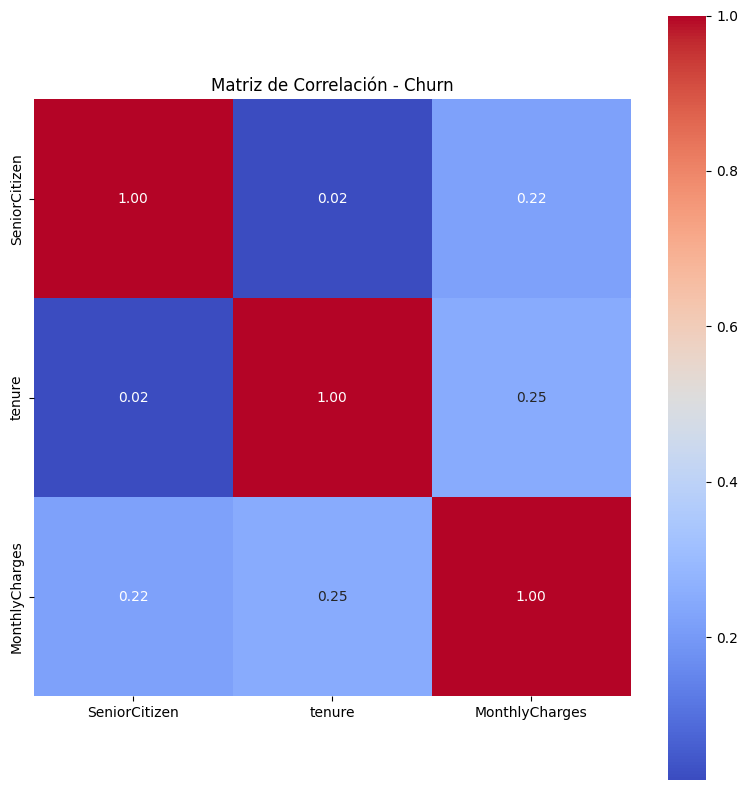

In [0]:
#Calcular y graficar la matriz de correlación para churn
df_churn_pd = df_churn.toPandas() #Aplico este paso, aprovechando que el dataset es pequeño, de lo contrario no seria optimo este metodo

plt.figure(figsize=(8, 8))
corr = df_churn_pd.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Matriz de Correlación - Churn")
plt.tight_layout()
display(plt.gcf())
plt.close()

Nota: Es curioso que en este primer analisis todas las correlaciones observadas de las columnas numericas son positivas; se realizara mas adelante el analisis cuando todas esten transformadas a ver los resultados de una manera mas profunda y poder sacar buenas hipotesis.

## Transformación - Data Encoding

In [0]:
#Elimino la columna de customerID para evitar errores cuando utilice tecnicas de OneHotEncoder
df_churn = df_churn.drop("customerID")

In [0]:

#Detectar columnas tipo Yes/No
yes_no_cols = []
for c in df_churn.columns:
    valores = [row[c] for row in df_churn.select(c).distinct().limit(10).collect()]
    if set(valores) == {"Yes", "No"}:
        yes_no_cols.append(c)

#Detectar columnas binarias numéricas
binary_numeric_cols = []
for c, t in df_churn.dtypes:
    if t in ["int", "double", "float"]:
        valores = [row[c] for row in df_churn.select(c).distinct().limit(10).collect()]
        if set(valores).issubset({0, 1}):
            binary_numeric_cols.append(c)

#Detectar columnas categóricas multivalor
categorical_cols = [
    c for c, t in df_churn.dtypes
    if t == "string"
    and c not in yes_no_cols
    and c != "Churn"
]

print("Yes/No:", yes_no_cols)
print("Numéricas binarias:", binary_numeric_cols)
print("Categóricas multivalor:", categorical_cols)



Yes/No: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Numéricas binarias: []
Categóricas multivalor: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [0]:
#Transformación YES/NO → 0/1

df_churn2 = df_churn
for c in yes_no_cols:
    df_churn2 = df_churn2.withColumn(
        c,
        when(col(c) == "Yes", lit(1)).when(col(c) == "No", lit(0)).otherwise(None)
    )

In [0]:
#frecuency encoding para categoricas (Esto lo hago con el objetivo de no utilizar onehot, ya que por temas de recursos no es viable)

for c in categorical_cols:
    freq_df = (
        df_churn2.groupBy(c).count()
        .withColumn("freq", col("count") / df_churn2.count())
        .select(c, "freq")
    )
    
    df_churn2 = df_churn2.join(freq_df, on=c, how="left").drop(c)
    df_churn2 = df_churn2.withColumnRenamed("freq", c + "_freq")



In [0]:

#preparar vector con las caracteristicas para el modelo
#nuevas columnas numéricas finales
numeric_final_cols = yes_no_cols + binary_numeric_cols + [c + "_freq" for c in categorical_cols]

#este metodo me ayuda a trabajar directamente con vector y no como dataframe para ayudar al rendimiento de procesamiento mas adelante
assembler = VectorAssembler(
    inputCols=numeric_final_cols,
    outputCol="features"
)

df_churn_final = assembler.transform(df_churn2).select("features", "Churn")

display(df_churn_final.limit(10))

features Churn {"type":"1","size":null,"indices":null,"values":["1.0","0.0","0.0","1.0","0.0","0.495243504188556","0.09683373562402385","0.34374556297032516","0.4966633536845094","0.3448814425670879","0.43944341899758627","0.4931137299446259","0.3989777083629135","0.39542808462303","0.5501916796819537","0.3357944057929859"]} 0 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","1.0","0.0","0.0","0.504756495811444","0.48132897912821243","0.34374556297032516","0.2866676132329973","0.43844952435041884","0.3438875479199205","0.4931137299446259","0.3989777083629135","0.39542808462303","0.20914383075394008","0.22887973874769274"]} 0 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","1.0","1.0","1.0","0.504756495811444","0.48132897912821243","0.34374556297032516","0.2866676132329973","0.3448814425670879","0.43944341899758627","0.4931137299446259","0.3989777083629135","0.39542808462303","0.5501916796819537","0.22887973874769274"]} 1 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","0.0","0.0","0.0","0.504756495811444","0.09683373562402385","0.34374556297032516","0.2866676132329973","0.43844952435041884","0.3438875479199205","0.2902172369728809","0.3989777083629135","0.39542808462303","0.20914383075394008","0.21922476217520942"]} 0 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","1.0","1.0","1.0","0.495243504188556","0.48132897912821243","0.4395854039471816","0.4966633536845094","0.43844952435041884","0.43944341899758627","0.4931137299446259","0.3989777083629135","0.39542808462303","0.5501916796819537","0.3357944057929859"]} 1 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","1.0","1.0","1.0","0.495243504188556","0.42183728524776376","0.4395854039471816","0.4966633536845094","0.43844952435041884","0.3438875479199205","0.4931137299446259","0.38435325855459324","0.3879028822944768","0.5501916796819537","0.3357944057929859"]} 1 {"type":"1","size":null,"indices":null,"values":["0.0","1.0","1.0","1.0","0.0","0.504756495811444","0.42183728524776376","0.4395854039471816","0.4966633536845094","0.3448814425670879","0.43944341899758627","0.4931137299446259","0.38435325855459324","0.39542808462303","0.5501916796819537","0.2161010932841119"]} 0 {"type":"1","size":null,"indices":null,"values":["0.0","0.0","0.0","0.0","0.0","0.495243504188556","0.09683373562402385","0.34374556297032516","0.2866676132329973","0.43844952435041884","0.43944341899758627","0.4931137299446259","0.3989777083629135","0.39542808462303","0.5501916796819537","0.22887973874769274"]} 0 {"type":"1","size":null,"indices":null,"values":["1.0","0.0","1.0","1.0","1.0","0.495243504188556","0.42183728524776376","0.4395854039471816","0.4966633536845094","0.43844952435041884","0.3438875479199205","0.2902172369728809","0.38435325855459324","0.3879028822944768","0.5501916796819537","0.3357944057929859"]} 1 {"type":"1","size":null,"indices":null,"values":["0.0","1.0","1.0","0.0","0.0","0.504756495811444","0.48132897912821243","0.34374556297032516","0.2866676132329973","0.3448814425670879","0.43944341899758627","0.4931137299446259","0.3989777083629135","0.39542808462303","0.20914383075394008","0.21922476217520942"]} 0

In [0]:
output_path = "dbfs:/Volumes/corona/silver/transform"

df_churn_final.write.format("delta").mode("overwrite").save(output_path)

print(f"Dataset guardado en : {output_path}")

Dataset guardado en : dbfs:/Volumes/corona/silver/transform


**Nota:** No se realiza el registro del Pipeline debido a que los recursos son limitados y prefiero gastar la capacidad para el registro del modelo; ademas, se realizo transformaciones sencillas y se pueden guardar los datos en formato delta para luego revisar la inferencia de los mismos con datos nuevos que en sí es unos de los beneficios del registro del pipeline.